# cs22mtech11008 K MANISH

# 2. SGD Update rule variations

$f(x,y) = 10x^2 + y^2$


In [28]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter 
from matplotlib.animation import FuncAnimation
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50


In [29]:
def fun(x, y):
    return 10 * x**2 + y**2

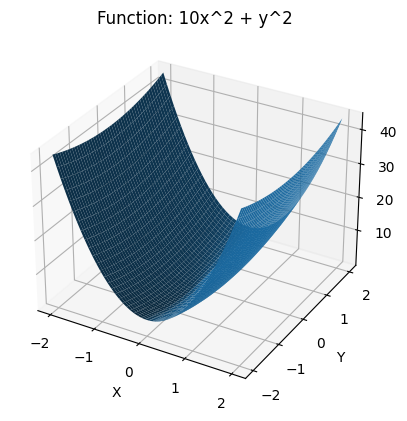

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate x and y values
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = fun(X, Y)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Function: 10x^2 + y^2')
# Show the plot
plt.show()


# contour represntation of above function

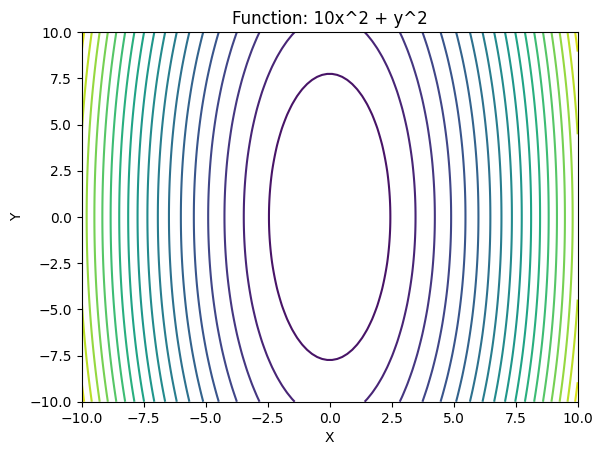

In [31]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fun(X, Y)
plt.contour(X, Y, Z, levels=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function: 10x^2 + y^2')
# Show the plot
plt.show()

# 2a) Vanilla SGD

In [32]:
def vanilla_sgd_update(x, y, lr):
    #print(x,y)
    storeXY = []
    storeXY.append([x, y])
    for i in range(50):
        dx = 20*x
        dy = 2*y
        x -= lr*dx
        y -= lr*dy
        storeXY.append([x, y])
    return storeXY


MovieWriter imagemagick unavailable; using Pillow instead.


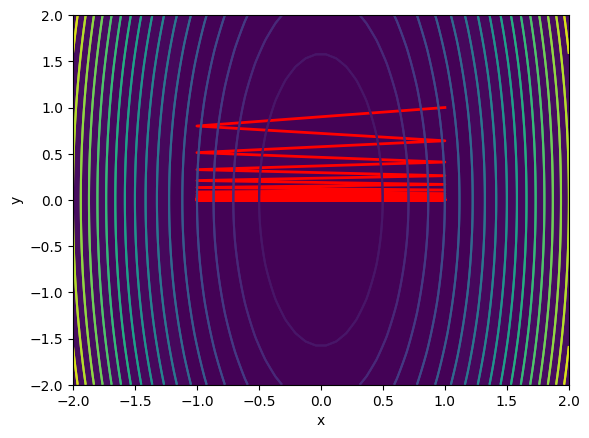

In [33]:
path=vanilla_sgd_update(1,1,0.1)
#this path will have all the points of x,y from that we draw our plots
x = 1
y = 1
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
line, = ax.plot([], [], lw=2)
ax.contourf(X,Y,Z, levels=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = fun(X, Y)

# Create a contour plot
plt.contour(X, Y, Z, levels=20)


def init():
    line.set_data([], [])
    return (line,)
#update function is called "numner of frames times"
def update(i):
    #x, y = vanilla_sgd_update(x, y, lr=0.1) 
    line.set_data(np.append(line.get_xdata(), path[i][0]), np.append(line.get_ydata(), path[i][1]))
    line.set_color('red')
    return (line,)

ani = FuncAnimation(fig, update, frames=50, init_func=init, blit=True)
ani.save('vanilla__final_sgd.gif', writer='imagemagick')
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Compute the corresponding z values
Z = fun(X, Y)

# Create a contour plot
plt.contour(X, Y, Z, levels=20)


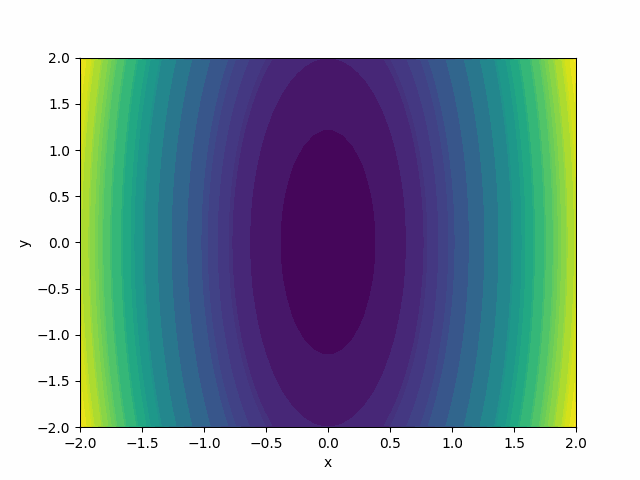

# 2b)SGD with momentum

In [7]:
def sgd_momentum(x, y, lr, gamma, prev_dx=0, prev_dy=0):
    dx=20 * x
    dy = 2 * y
    dx_m = gamma * prev_dx + lr * dx
    dy_m = gamma * prev_dy + lr * dy
    
    # update the parameters
    x -= dx_m
    y -= dy_m
    
    return x, y, dx_m, dy_m


MovieWriter imagemagick unavailable; using Pillow instead.


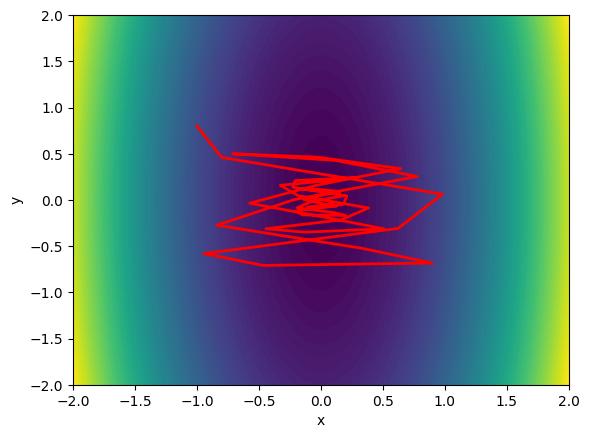

In [8]:
np.random.seed(42)
x = 1
y = 1

v_x = 0
v_y = 0
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
line, = ax.plot([], [], lw=2)
ax.contourf(X,Y,Z, levels=100)
ax.set_xlabel('x')
ax.set_ylabel('y')



def init():
    line.set_data([], [])
    return (line,)
#update function is called "numner of frames times"
def update(i):
    global x, y, v_x, v_y
    x, y, v_x, v_y = sgd_momentum(x, y, 0.1, 0.9, v_x, v_y)
    line.set_data(np.append(line.get_xdata(), x), np.append(line.get_ydata(), y))
    line.set_color('red')
    return (line,)

ani = FuncAnimation(fig, update, frames=50, init_func=init, blit=True)
ani.save('sgd_mom_final_x.gif', writer='imagemagick')


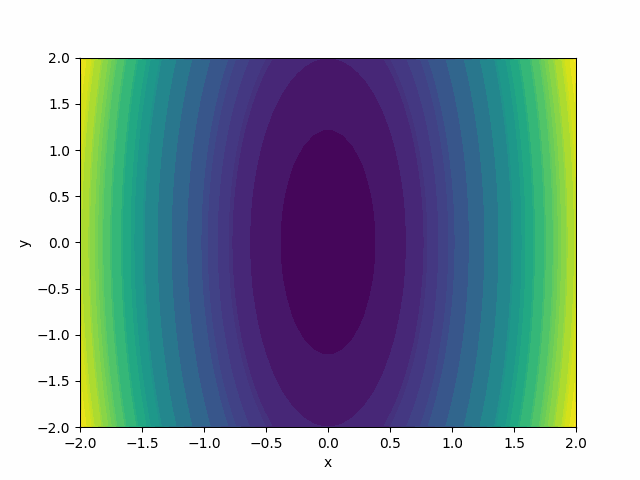

# 2c)Nesterov Momentum

In [9]:
def nesterov_momentum_update(x, y, lr):
    
    momentum = 0.9
    pvx = pvy = 0
    
    storeXY = []
    storeXY.append([x, y])
    for i in range(50):
        upd_x, upd_y = momentum * pvx, momentum * pvy
        dx=20*(x - upd_x)
        dy=2*(y - upd_y)

        # update the velocity using momentum and current gradient
        v_x = momentum * pvx + lr * dx
        v_y = momentum * pvy + lr * dy
        x=x-v_x
        y=y-v_y
        pvx=v_x
        pvy=v_y
        
        storeXY.append([x, y])
    
    return storeXY

MovieWriter imagemagick unavailable; using Pillow instead.


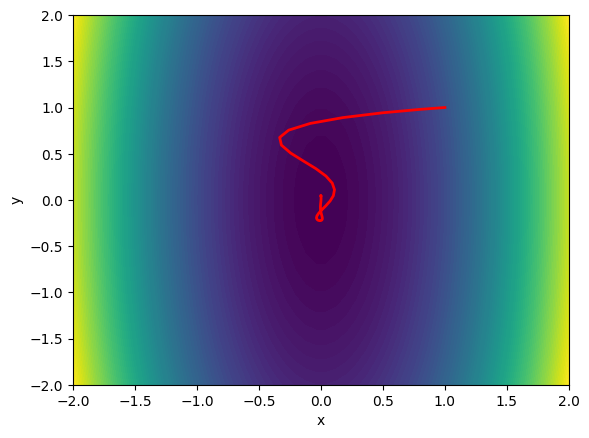

In [10]:
path = nesterov_momentum_update(1, 1, 0.01)
#path has all x,y points from this we create animations
 
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
line, = ax.plot([], [], lw=2)
ax.contourf(X,Y,Z, levels=100)
ax.set_xlabel('x')
ax.set_ylabel('y')



# generate x and y values
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# compute the corresponding z values
Z = fun(X, Y)

# define the initialization function
def init():
    line.set_data([], [])
    return (line,)


#update function is called "numner of frames times"    
def update(i):
    line.set_data(np.append(line.get_xdata(), path[i][0]), np.append(line.get_ydata(), path[i][1]))

    line.set_color('red')
  
    return (line,)
# create the animation
line.set_data(np.append(line.get_xdata(), x), np.append(line.get_ydata(), y))
ani = FuncAnimation(fig, update, frames=50, init_func=init, blit=True)

ani.save('nesterov_momentum_final.gif', writer='imagemagick')

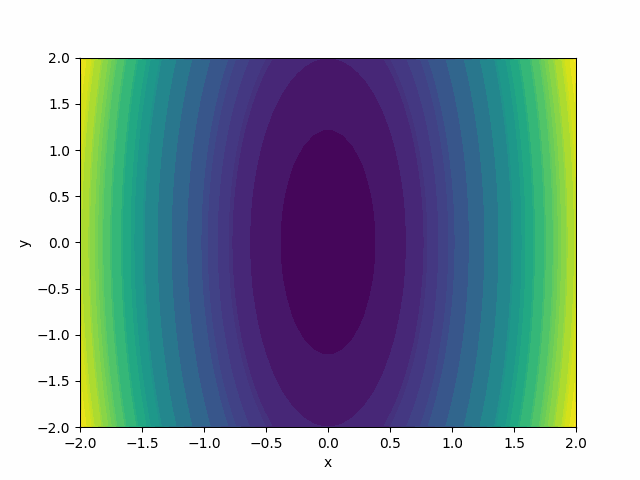

# 2d)AdaGrad

In [11]:
def adagrad(x,y,grad_sq_x,grad_sq_y):
    dx=20*x
    dy=2*y
    grad_sq_x +=dx*dx
    grad_sq_y +=dy*dy
    x-=0.1*dx/(grad_sq_x)**0.5+10**-8
    y-=0.1*dy/(grad_sq_y)**0.5+10**-8
    return x,y,grad_sq_x,grad_sq_y

MovieWriter imagemagick unavailable; using Pillow instead.


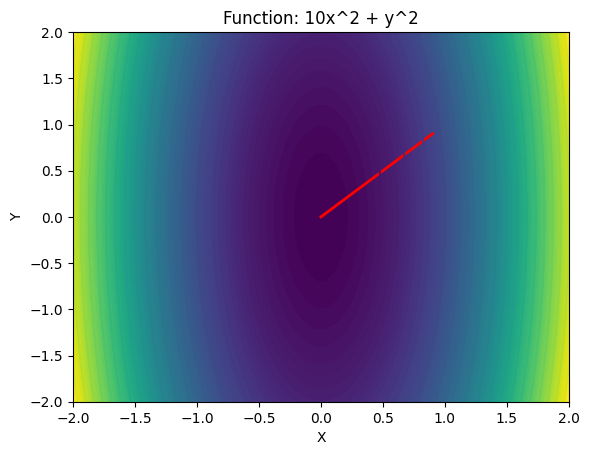

In [12]:
x = 1
y = 1
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
line, = ax.plot([], [], lw=2)
ax.contourf(X,Y,Z, levels=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
def init():
    line.set_data([], [])
    return (line,)
grad_sq_x,grad_sq_y=0,0
def update(i):
    global x, y,grad_sq_x,grad_sq_y
    x, y ,grad_sq_x,grad_sq_y= adagrad(x, y, grad_sq_x,grad_sq_y)
    line.set_data(np.append(line.get_xdata(), x), np.append(line.get_ydata(), y))
    line.set_color('red')
    return (line,)

ani = FuncAnimation(fig, update, frames=250, init_func=init, blit=True)
ani.save('adagrad.gif', writer='imagemagick')



# Generate x and y values
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

Z = fun(X, Y)

plt.contour(X, Y, Z, levels=20)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function: 10x^2 + y^2')


plt.show()


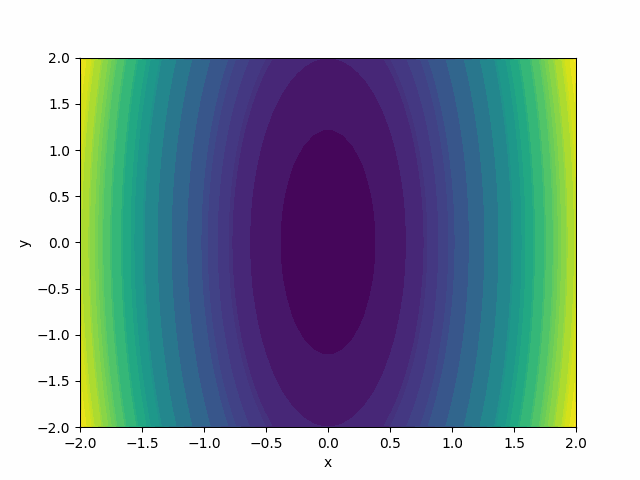

# 2e)RMSProp 

In [13]:
def rms(x,y,grad_sq_x,grad_sq_y):
    dx=20*x
    dy=2*y
    rho=0.1
    grad_sq_x =rho*grad_sq_x+(1-rho)*(dx**2)
    grad_sq_y =rho*grad_sq_y+(1-rho)*(dy**2)
    x-=0.1*dx/(grad_sq_x)**0.5+10**-8
    y-=0.1*dy/(grad_sq_y)**0.5+10**-8
    return x,y,grad_sq_x,grad_sq_y

MovieWriter imagemagick unavailable; using Pillow instead.


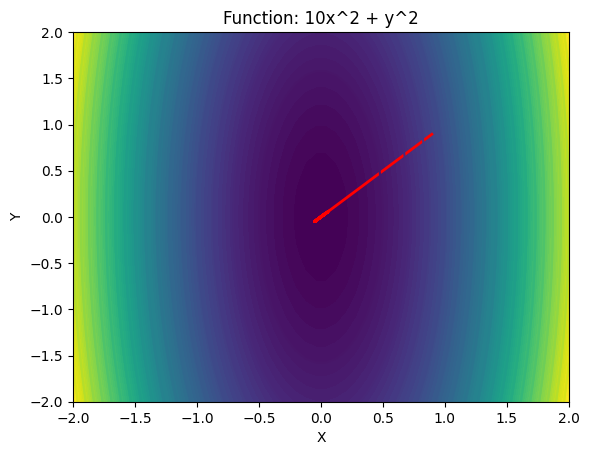

In [14]:
x = 1
y = 1
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
line, = ax.plot([], [], lw=2)
ax.contourf(X,Y,Z, levels=100)
ax.set_xlabel('x')
ax.set_ylabel('y')


def init():
    line.set_data([], [])
    return (line,)
grad_sq_x,grad_sq_y=0,0
#update function is called "numner of frames times"
def update(i):
    global x, y,grad_sq_x,grad_sq_y
    
    x, y ,grad_sq_x,grad_sq_y= rms(x, y, grad_sq_x,grad_sq_y)
    line.set_data(np.append(line.get_xdata(), x), np.append(line.get_ydata(), y))
    
    line.set_color('red')
    return (line,)

ani = FuncAnimation(fig, update, frames=50, init_func=init, blit=True)
ani.save('rms.gif', writer='imagemagick')





x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = fun(X, Y)
plt.contour(X, Y, Z, levels=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function: 10x^2 + y^2')
plt.show()


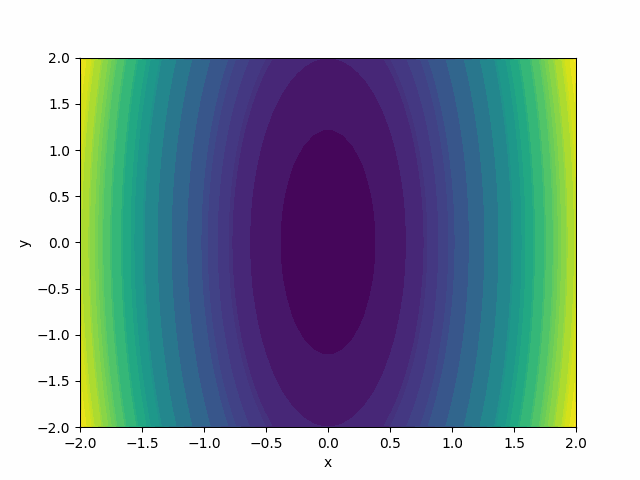

# final images 

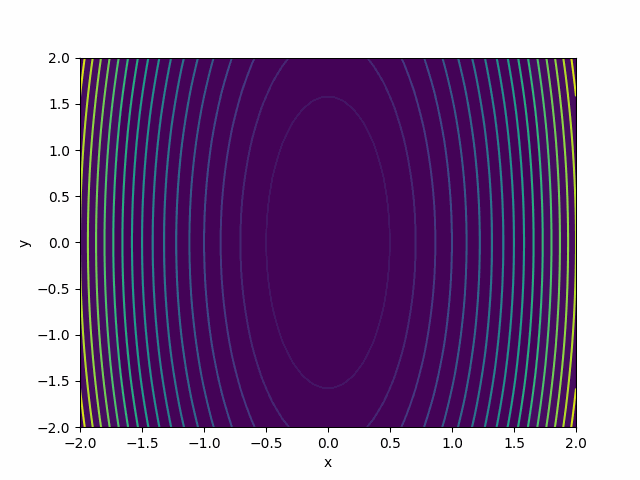

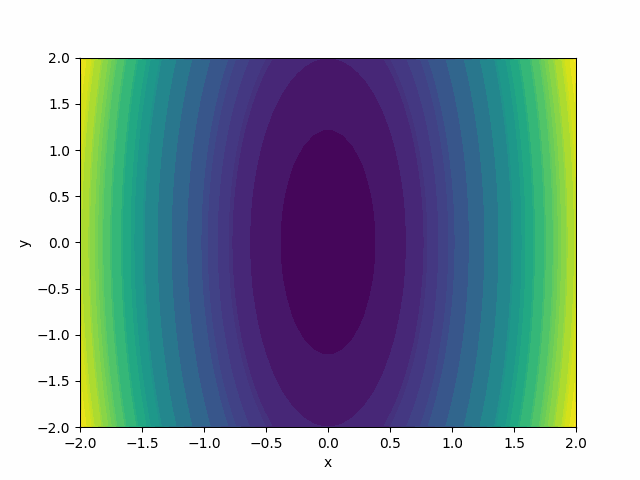

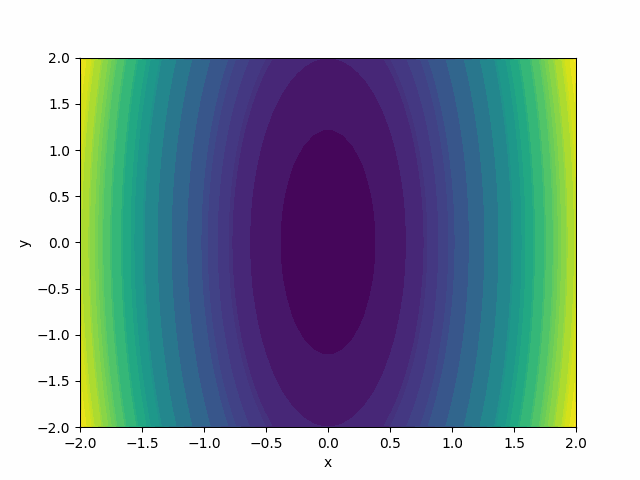

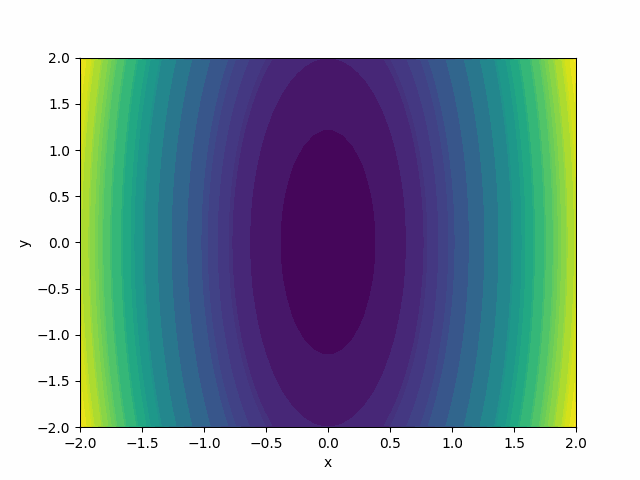

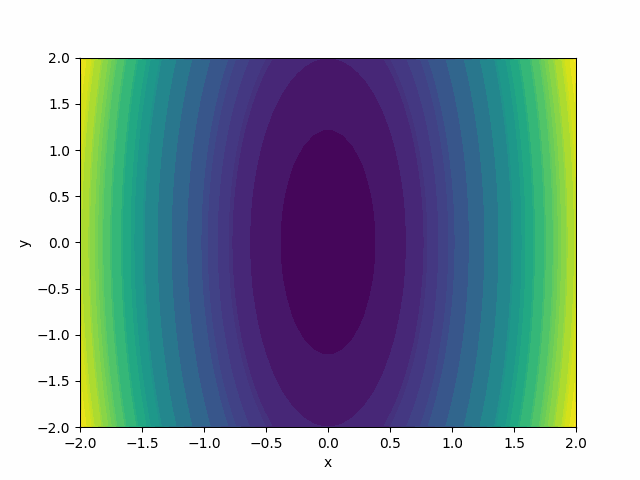

# 1a)Variants of Backprop for visualizing CNNs

In [17]:
import torch
import cv2
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.models import resnet50
from torch.autograd import Function
from torch.nn import functional as F
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)

# Define the transforms to be applied to the input images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])


Using cache found in /home/manish/.cache/torch/hub/pytorch_vision_v0.9.0
/home/manish/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/manish/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
image_path1 = '/home/manish/Downloads/i1.jpg'
image1 = Image.open(image_path1)
image_path2 = '/home/manish/Downloads/i2.jpg'
image2 = Image.open(image_path2)
image_path3 = '/home/manish/Downloads/i3.jpg'
image3 = Image.open(image_path3)
image_path4 = '/home/manish/Downloads/i4.jpg'
image4= Image.open(image_path4)
image_path5 = '/home/manish/Downloads/i5.jpg'
image5 = Image.open(image_path5)
images=[image1 ,image2 ,image3 ,image4 ,image5]
path=[image_path1,image_path2,image_path3,image_path4,image_path5]

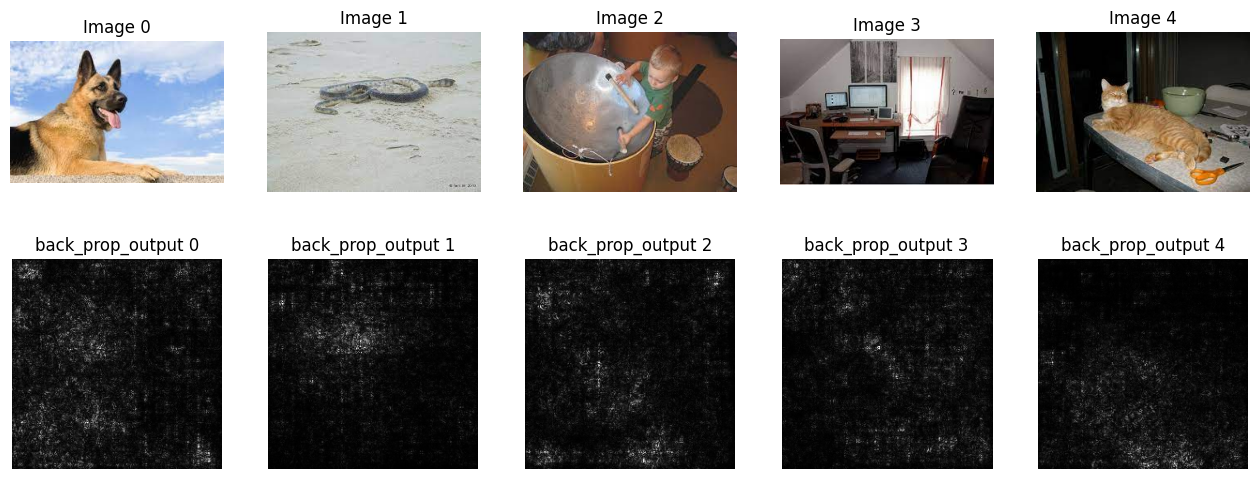

In [19]:
image_paths = [image_path1,image_path2,image_path3,image_path4,image_path5]
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
j=0
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)

    # Apply transforms
    input_image = transform(image).unsqueeze(0)
    input_image.requires_grad = True
    model.eval()
    output_tensor = model(input_image)

    # highest predicted score in the output tensor
    predicted_class_index = torch.argmax(output_tensor).item()

    # Compute the gradients of the output tensor 
    output_tensor[0, predicted_class_index].backward()

    # Normalize the gradients and extract the gradients corresponding to the highest predicted score
    gradients = input_image.grad.squeeze()
    gradients /= torch.norm(gradients)
    gradients = gradients.abs().max(dim=0)[0]
    axs[0, j].imshow(image)
    axs[0, j].axis('off')
    axs[0, j].set_title(f'Image {i}')
    axs[1, j].imshow(gradients.detach().numpy(), cmap='Greys_r')
    axs[1, j].axis('off')
    axs[1, j].set_title(f'back_prop_output {i}')
    j=j+1
    


#plt.tight_layout()
plt.show()


# 1b)Guided-back-propagation

In [20]:
class GuidedBackpropReLU(Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)
    
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        grad_input[input == 0] = 0.5 * grad_input[input == 0]
        return grad_input

def guided_backpropagation(model, input_image):
    # Set model to eval mode
    model.eval()
    for module in model.modules():
        if isinstance(module, nn.ReLU):
            module.register_backward_hook(lambda _, grad_out, __: (torch.clamp(grad_out[0], min=0.0),))
        elif isinstance(module, nn.ReLU6):
            module.register_backward_hook(lambda _, grad_out, __: (torch.clamp(grad_out[0], min=0.0, max=1.0),))

    input_image.requires_grad = True
    output = model(input_image)
    neuron_idx = torch.argmax(output)#highest neuron

    #Compute loss
    loss = output[0, neuron_idx]

    #Backward pass with guided backpropagation
    model.zero_grad()
    loss.backward()
    gradients = input_image.grad.data
    gb_gradients = GuidedBackpropReLU.apply(gradients)

    #Return guided backpropagation gradients and neuron index
    return gb_gradients, neuron_idx.item()

/home/manish/.local/lib/python3.8/site-packages/torch/nn/modules/module.py:1113: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


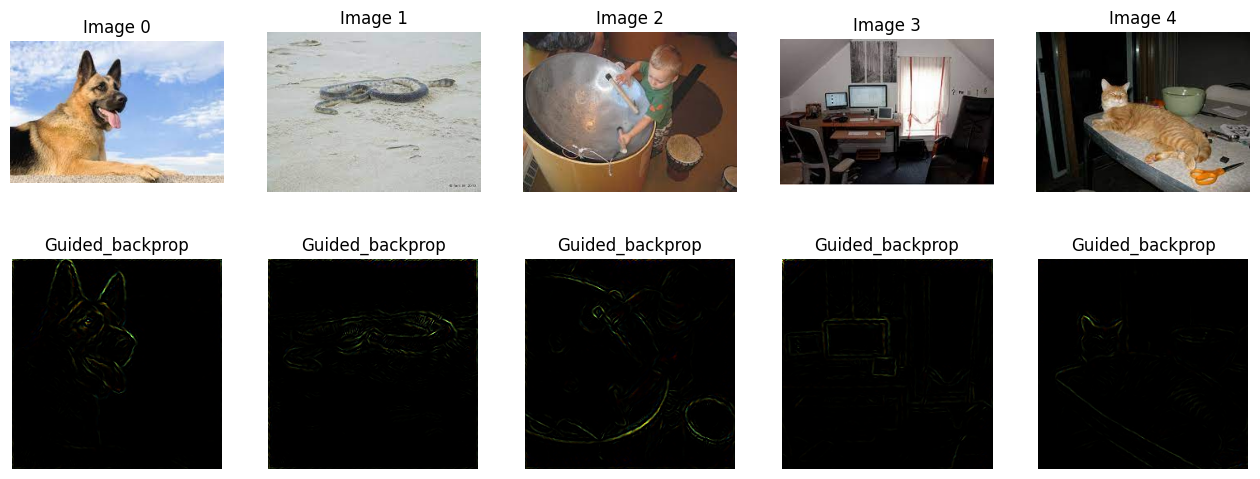

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
i1=0;
# Load example images and compute guided backpropagation
#image_paths = ['path/to/image1.jpg', 'path/to/image2.jpg', 'path/to/image3.jpg', 'path/to/image4.jpg', 'path/to/image5.jpg']
for image_path in image_paths:
    img = Image.open(image_path).convert('RGB')

    # Apply transformation
    img_tensor = transform(img).unsqueeze(0)

    # Compute guided backpropagation
    gb_gradients, neuron_idx = guided_backpropagation(model, img_tensor)

    # Normalize gradients
    #gb_gradients = gb_gradients / torch.max(torch.abs(gb_gradients))
    gb_gradients -= gb_gradients.min()
    gb_gradients /= gb_gradients.max()


    # Convert gradients to numpy array and plot image and guided backpropagation map
    gb_map = gb_gradients.squeeze().permute(1, 2, 0).numpy()
    axs[0, i1].imshow(img)
    axs[0, i1].axis('off')
    axs[0, i1].set_title(f'Image {i1}')
    axs[1, i1].imshow(gb_map,cmap='Greys_r')
    axs[1, i1].axis('off')
    axs[1, i1].set_title('Guided_backprop')
    i1=i1+1
plt.show()

# 1c) Class Activatoin Map (CAM)

In [22]:
# Define hook for last convolutional layer
model = resnet50(pretrained=True)
model.eval()

#
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Define hook for last convolutional layer
features = None
def hook(module, input, output):
    global features
    features = output

model.layer4[-1].conv3.register_forward_hook(hook)

features = None
def hook(module, input, output):
    global features
    features = output

model.layer4[-1].conv3.register_forward_hook(hook)


In [23]:
def CAM(path):
    fig, axs = plt.subplots(2, 5, figsize=(16, 6))
    j=0
    for img_p in path:
        img_path = img_p
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img)
        img_tensor = transform(img_pil).unsqueeze(0)
        output = model(img_tensor)

        # neuron with highest predicted score
        neuron_idx = torch.argmax(output)

        # Compute CAM for highest predicted class
        alpha_c = F.adaptive_avg_pool2d(features, 1)
        cam = alpha_c * features
        cam = torch.sum(cam, dim=1, keepdim=True)
        cam = F.relu(cam)
        upsample = torch.nn.Upsample(size=img_tensor.shape[-2:], mode='bilinear', align_corners=False)
        cam = upsample(cam)

        # Normalize 
        cam = cam / torch.max(cam)
        cam_map = cam.detach().numpy()[0][0]
        cam_map = cv2.resize(cam_map, (img.shape[1], img.shape[0]))

        # Convert CAM to heatmap
        heatmap = cv2.applyColorMap(np.uint8(255*cam_map), cv2.COLORMAP_JET)
        result = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
        axs[0, j].imshow(img)
        axs[0, j].axis('off')
        axs[0, j].set_title(f'Image {j}')
        axs[1, j].imshow(result)
        axs[1, j].axis('off')
        axs[1, j].set_title(f'CAM_OUTPUT {j}')
        j=j+1
        plt.imshow(result)

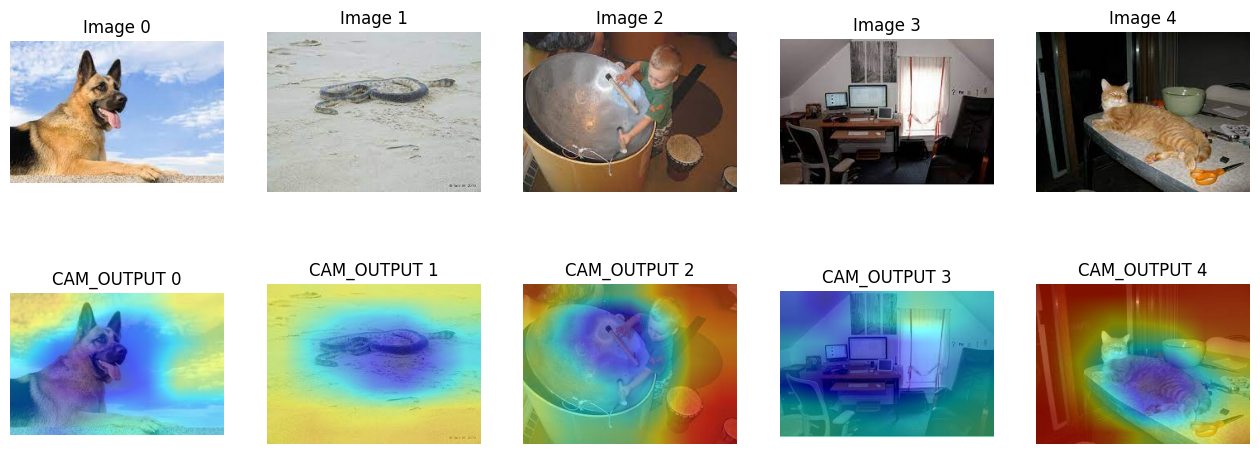

In [24]:
path=[image_path1,image_path2,image_path3,image_path4,image_path5]
CAM(path)


# 1d)Guided Grad-CAM

In [25]:
def totensor(path):
    #img_path = '/home/manish/Downloads/i3.jpg'
    img = Image.open(path)

# Define a transform to convert the image to a tensor
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])

# Apply the transform to the image
    img_tensor = transform(img)

# Add an extra dimension to the tensor to represent the batch size
    img_tensor = img_tensor.unsqueeze(0)

# Print the tensor shape
    return img_tensor


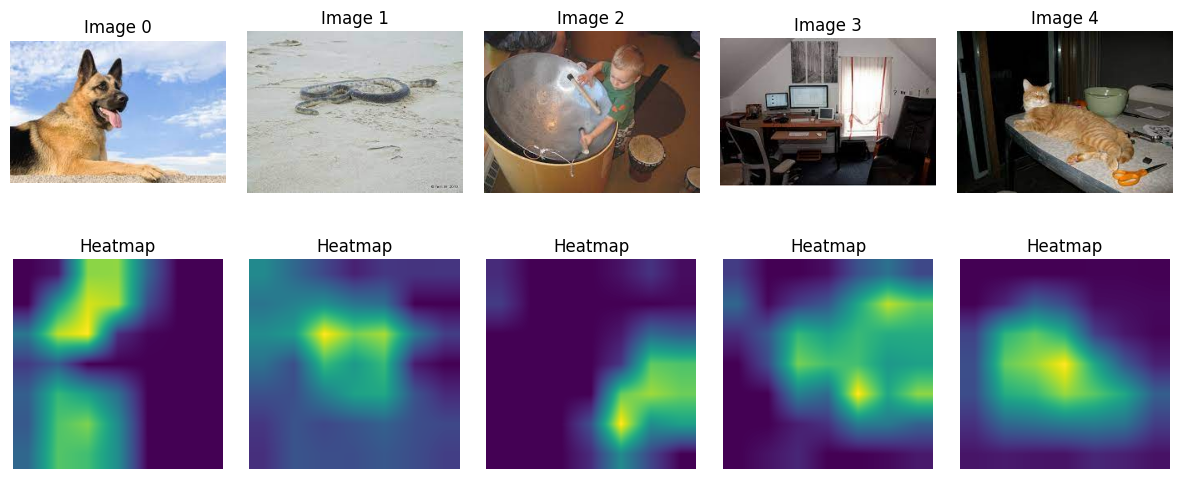

In [27]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(wspace=0.1)
image_paths = [image_path1,image_path2,image_path3,image_path4,image_path5]
img_paths=image_paths

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
for i in range(5):
    input_tensor = totensor(img_paths[i])# Create an input tensor image for your model..
    # Note: input_tensor can be a batch tensor with several images!

    # Construct the CAM object once, and then re-use it on many images:
    cam = GradCAM(model=model, target_layers=target_layers)

    targets = [ClassifierOutputTarget(281)]

    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    #plt.imshow(grayscale_cam)
    #plt.imshow(image3)
    image1 = Image.open(img_paths[i])
    axs[0, i].imshow(image1)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Image {i}')
    axs[1, i].imshow(grayscale_cam)
    axs[1, i].axis('off')
    axs[1, i].set_title('Heatmap')

# Show the plot
plt.show()
